# Bivariate Ananlysis on the Forest Fire data

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [2]:
df = pd.read_csv("forestfires.csv")

In [3]:
print("Information about the dataset : ")
print(df.info())

Information about the dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


In [4]:
print("Basic Stats on the features of the Dataset : ")
print(df.describe())

Basic Stats on the features of the Dataset : 
                X           Y        FFMC  ...        wind        rain         area
count  517.000000  517.000000  517.000000  ...  517.000000  517.000000   517.000000
mean     4.669246    4.299807   90.644681  ...    4.017602    0.021663    12.847292
std      2.313778    1.229900    5.520111  ...    1.791653    0.295959    63.655818
min      1.000000    2.000000   18.700000  ...    0.400000    0.000000     0.000000
25%      3.000000    4.000000   90.200000  ...    2.700000    0.000000     0.000000
50%      4.000000    4.000000   91.600000  ...    4.000000    0.000000     0.520000
75%      7.000000    5.000000   92.900000  ...    4.900000    0.000000     6.570000
max      9.000000    9.000000   96.200000  ...    9.400000    6.400000  1090.840000

[8 rows x 11 columns]


To the reduce the highly skewd target we are tranforming the target variable in log scale.Feaure variables are left as it is.


In [5]:
df['area'] = df['area'].apply(lambda x : np.log(x+1))

## Bivariate Analysis of of the features to the target variable

### Analysis of area of forest burned per month

First we observe the relative area of forest destroyed by fire per month.

In [6]:
def get_pie_plot(feature):

  df1 = df.groupby(feature).sum()  
  df1 = df1[df1.area >0 ]

  theme = plt.get_cmap('hsv')
  cs = theme(np.arange(len(df1.area))/len(df1.area))
  _ , ax = plt.subplots(figsize = (10, 10))
  plt.pie(df1.area,labels = df1.index, colors = cs)
  plt.title("Relative amount of area affected per "+feature, fontsize = 20)
  plt.show()

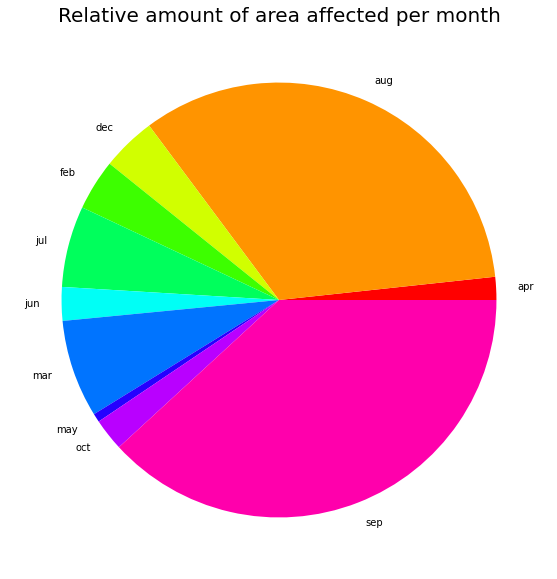

In [7]:
get_pie_plot('month')

We Observed the following from the pie chart :

*   We observe that the most of damage from the forest fires occour during September and August.
*   Apart from these months, major forest fires occoured during July and March.
*   No forest fire occured during November.



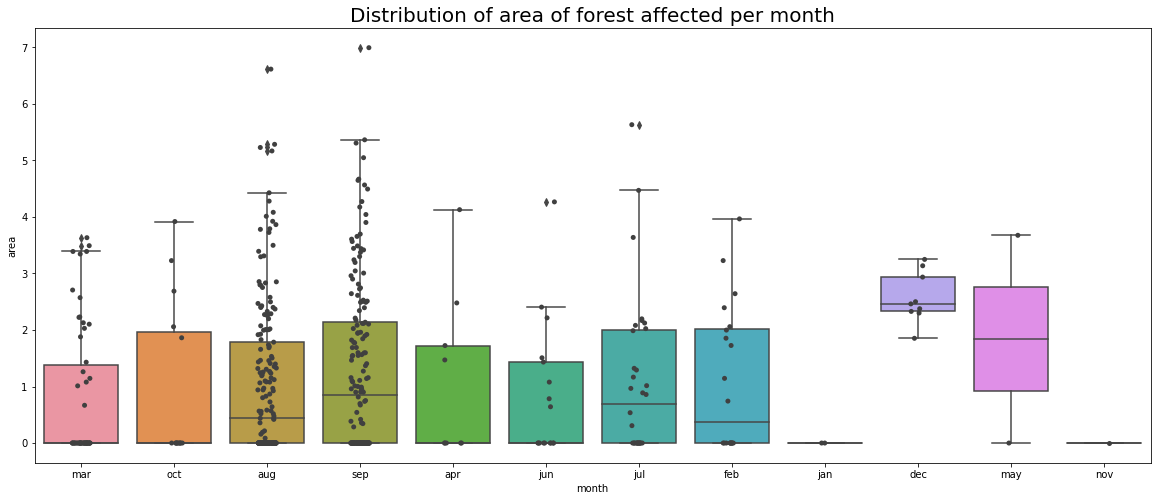

In [8]:
_,ax = plt.subplots(figsize = (20,8))
sns.boxplot(x = "month", y ="area", data =df, ax = ax)
sns.stripplot(x = "month", y ="area", data =df, ax = ax, color = "0.25")
plt.title("Distribution of area of forest affected per month", fontsize = 20)
plt.show()

We notice the following from the box plot :

* Majority of the forest fires occoured during August and September.These include major forest fires and also very minimal forest fire.Forest fires during this month caused most damage to the forest.

* Chances of a Forest fires in January and November are negligible.

* During May and December there were few forest fires but the amount of area burnt per forest fire was quite high.

* Few forest fires were experienced in March, April, June, October but these months were mostly calm.This is evident from the mean line of the box plot which in their case lies very close to zero.

### Analysis of area of forest burned per day of the week

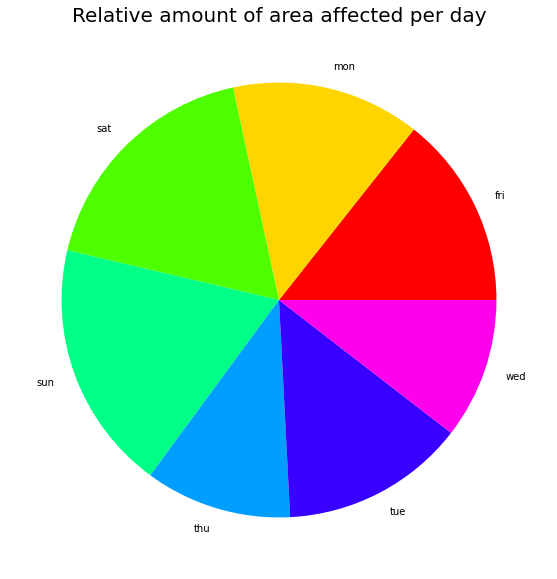

In [9]:
get_pie_plot('day')

* We observe that forest fires were almost evenly distributed over the days of the week.We can inferr weak hypothesis that the forest fires are not dependent on the days of the week.

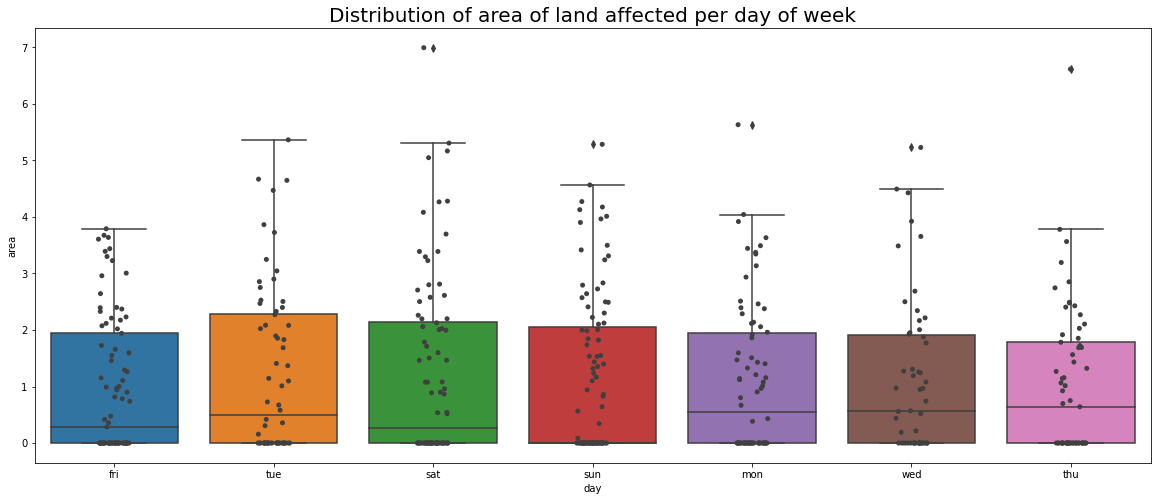

In [10]:
_,ax = plt.subplots(figsize = (20,8))
sns.boxplot(x = "day", y ="area", data =df, ax = ax)
sns.stripplot(x = "day", y ="area", data =df, ax = ax, color = "0.25")
plt.title("Distribution of area of land affected per day of week", fontsize = 20)
plt.show()

* The data seems to be evenly distributed altough we see that most of the sundays do not experience forest fires.
* Rate of forest fires on Saturdays and Fridays are also lower than other week days.
* Data seems almost evenely distributed and not of much use in it's raw form.

### Helper function and datasets

In [11]:
## Helper Function
def numerical_analysis(x ,y, pal="crest", c1="red",c2="green"):

  _ , ax = plt.subplots(1,3, figsize = (30,10))
  sns.scatterplot(x = x,y= y, data = df, hue = y, palette= pal, ax = ax[0])
  ax[0].set_title("General scatterplot showing Forest fire area for different values of "+x)
  sns.kdeplot(fire[x], fill = True, color = c1, ax =ax[1], label = "Fire Cases")
  sns.kdeplot(no_fire[x], fill = True, color = c2, ax = ax[1], label = "Non-fire Cases")
  ax[1].legend()
  ax[1].set_title("Distribution of the  data in fire and non-Fire cases")
  sns.kdeplot(x,data = fire, hue =y, fill = True, ax =ax[2], palette= "coolwarm")
  ax[2].set_title("Distribution of the  data according to various levels of severeity of Forest Fire")

In [12]:
def replace_fire(x):
  if(x>med[2]):
    return 4
  elif(x>=med[1]):
    return 3
  elif(x>=med[0]):
    return 2
  elif(x> 0):
    return 1
  return x

In [13]:
# New datasets created for analysis
fire = df[df.area>0.0]
med = np.percentile(fire.area,[25, 50, 75])
fire['area'] = fire['area'].apply(lambda x : replace_fire(x))
no_fire = df[df.area == 0.0]

### Analysis of forest fire area with FFMC

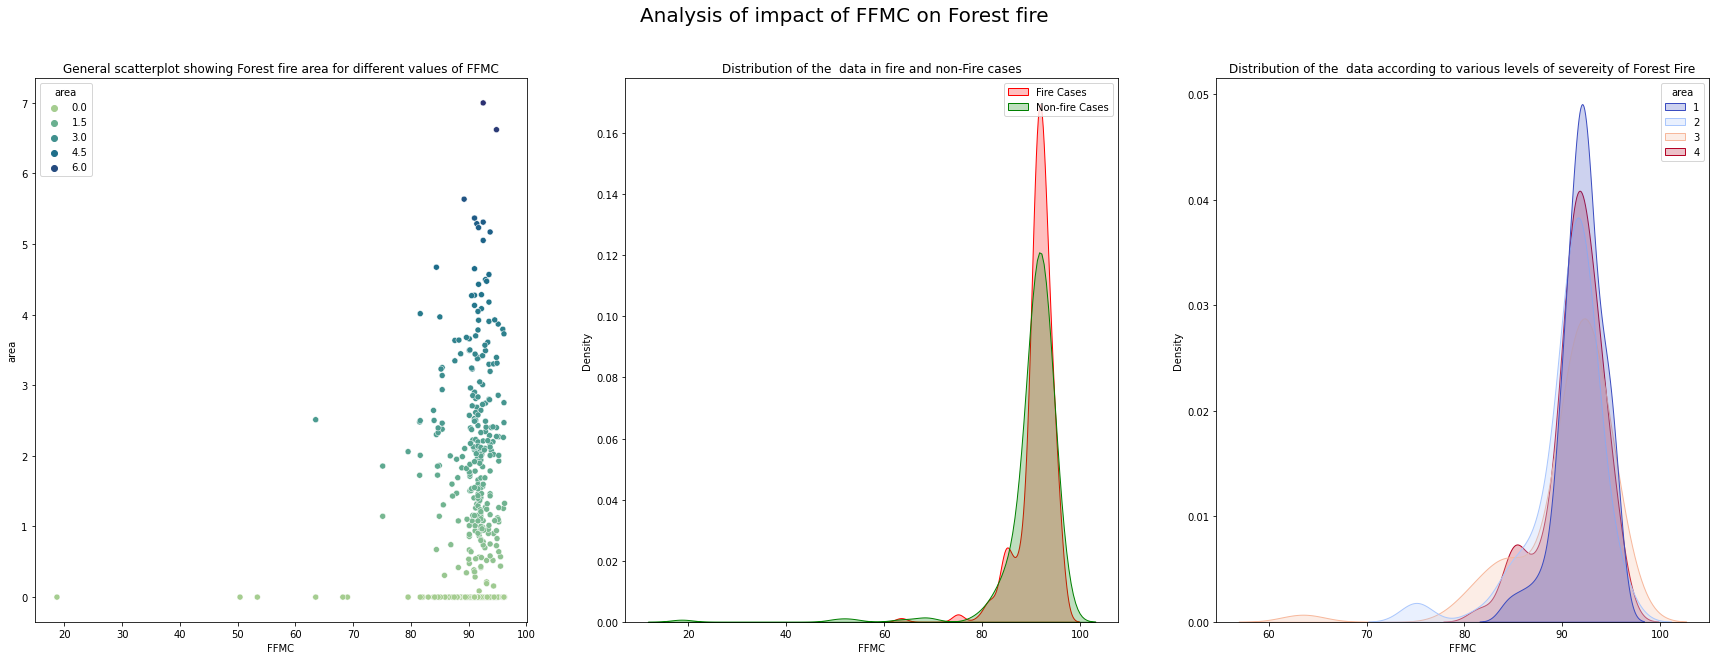

In [14]:
numerical_analysis("FFMC","area")
plt.suptitle("Analysis of impact of FFMC on Forest fire", fontsize =20)
plt.show()

* FFMC distribution is skewed as we can understand from the data distribution in the 2nd plot.
* Skewed Distribution indicates a general climate feature, so there is a hypothesis it might not much of individual contribution to the forest fire.
* One may say that there is a lot forest fires at the range of 80-100.The truth is forest fire is both probable and unprobabale in such cases.But the probability distribution suggests that there is higher chance of forest fire if the FFMC value is near 90.This is a poor guess and gives low value on hypothesis tests.

### Analysis of forest fire area with DMC 

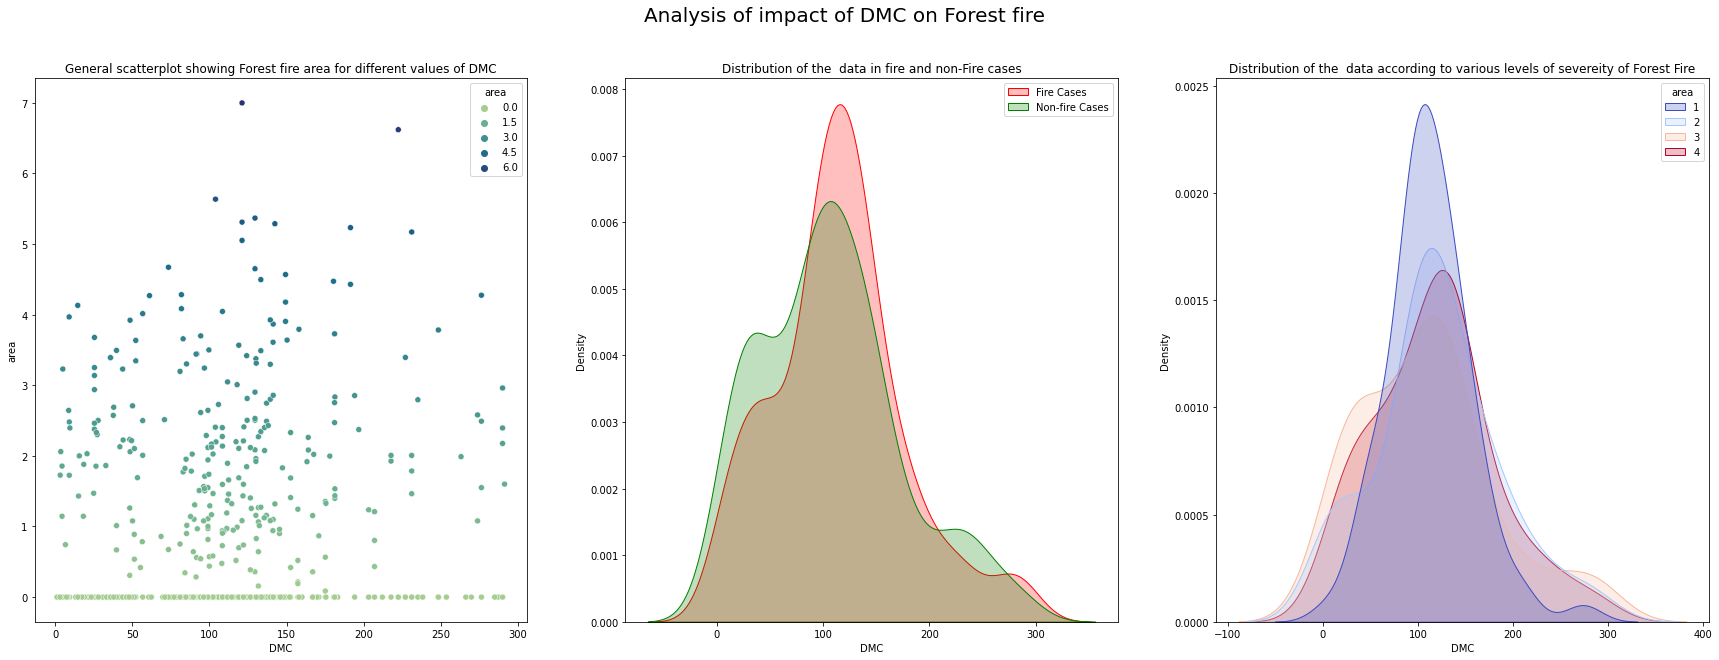

In [15]:
numerical_analysis("DMC","area")
plt.suptitle("Analysis of impact of DMC on Forest fire", fontsize =20)
plt.show()

* DMC values ranges from 0 to 300.The values are accompained by both forest fires and non-forest fires and are nearly equally distributed.
* However at values of near 100 there are high chances of mild forest fires as we can understand from the 3rd plot.

### Analysis of forest fire area with DC




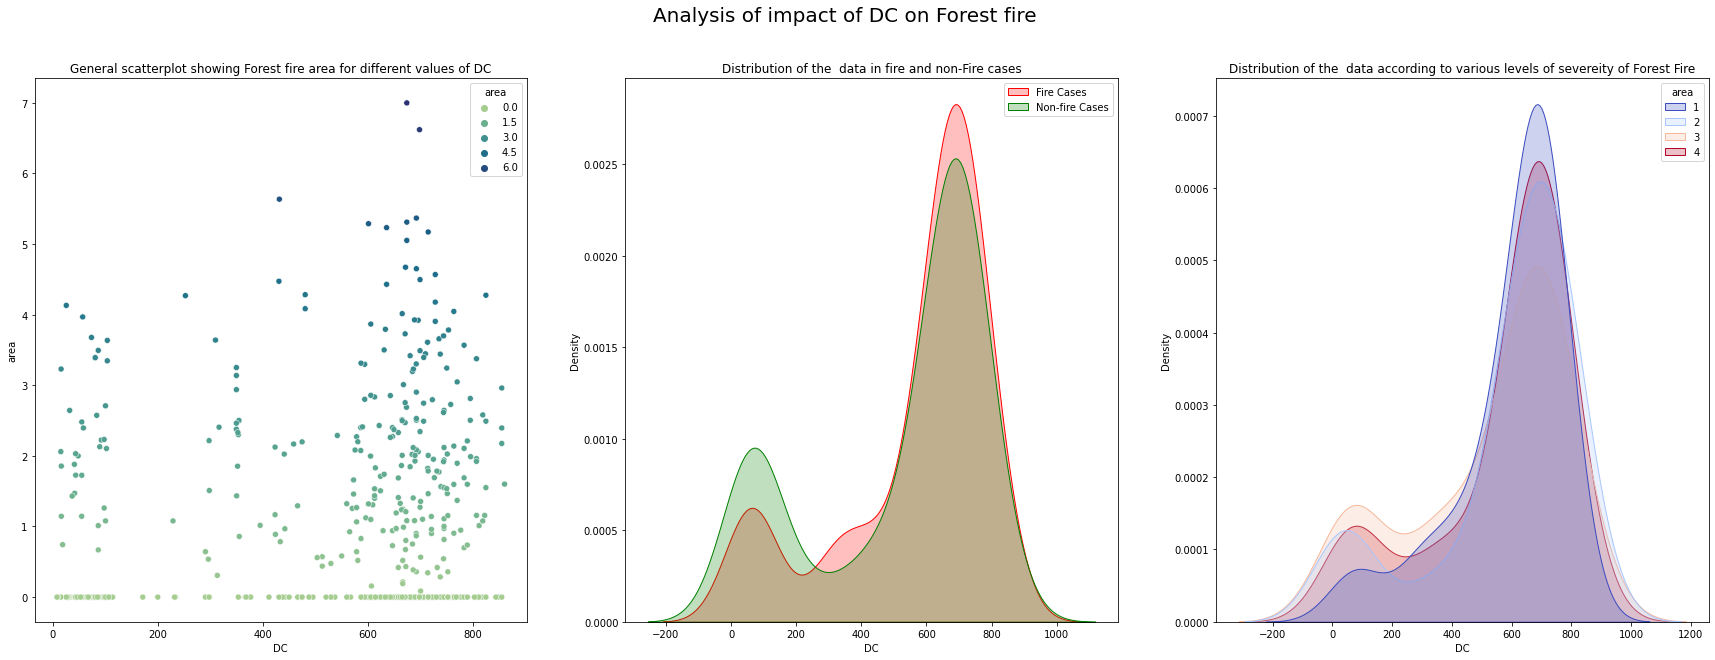

In [16]:
numerical_analysis("DC","area")
plt.suptitle("Analysis of impact of DC on Forest fire", fontsize =20)
plt.show()

* DC values ranges from 0 to 900.
* Although we see nearly equal distribution of data.The forest fire is skewed towards the right which indicates that for values near 600-800 there is a high chance of forest fire.

### Analysis of forest fire area with ISI

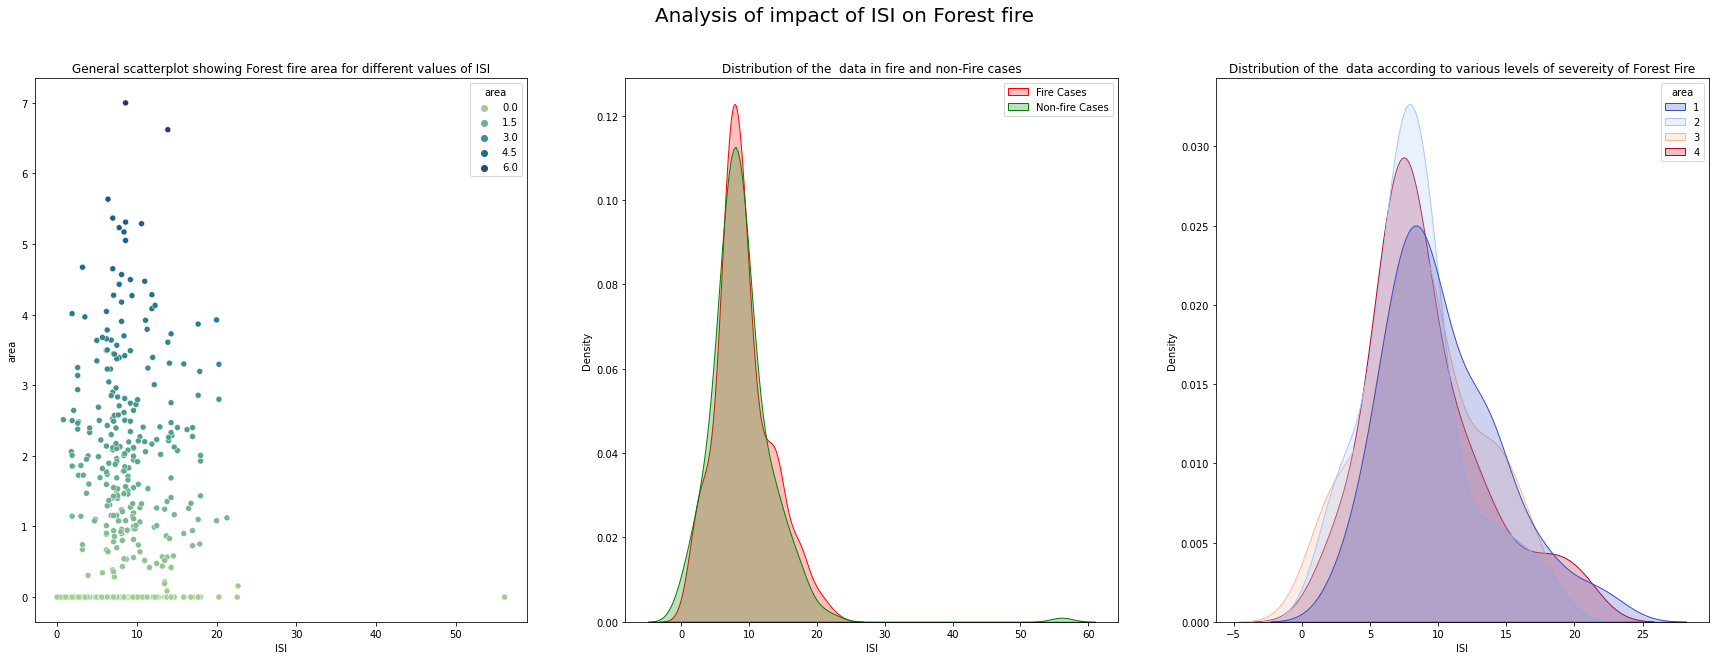

In [17]:
numerical_analysis("ISI","area")
plt.suptitle("Analysis of impact of ISI on Forest fire", fontsize =20)
plt.show()

* The ISI is skewed to the left which indicates a feature due to some constant climate or natural conditions.
* The data suggests that forest fires and non-forest fires are nearly equally probable in such cases.

### Analysis of forest fire area with temperature

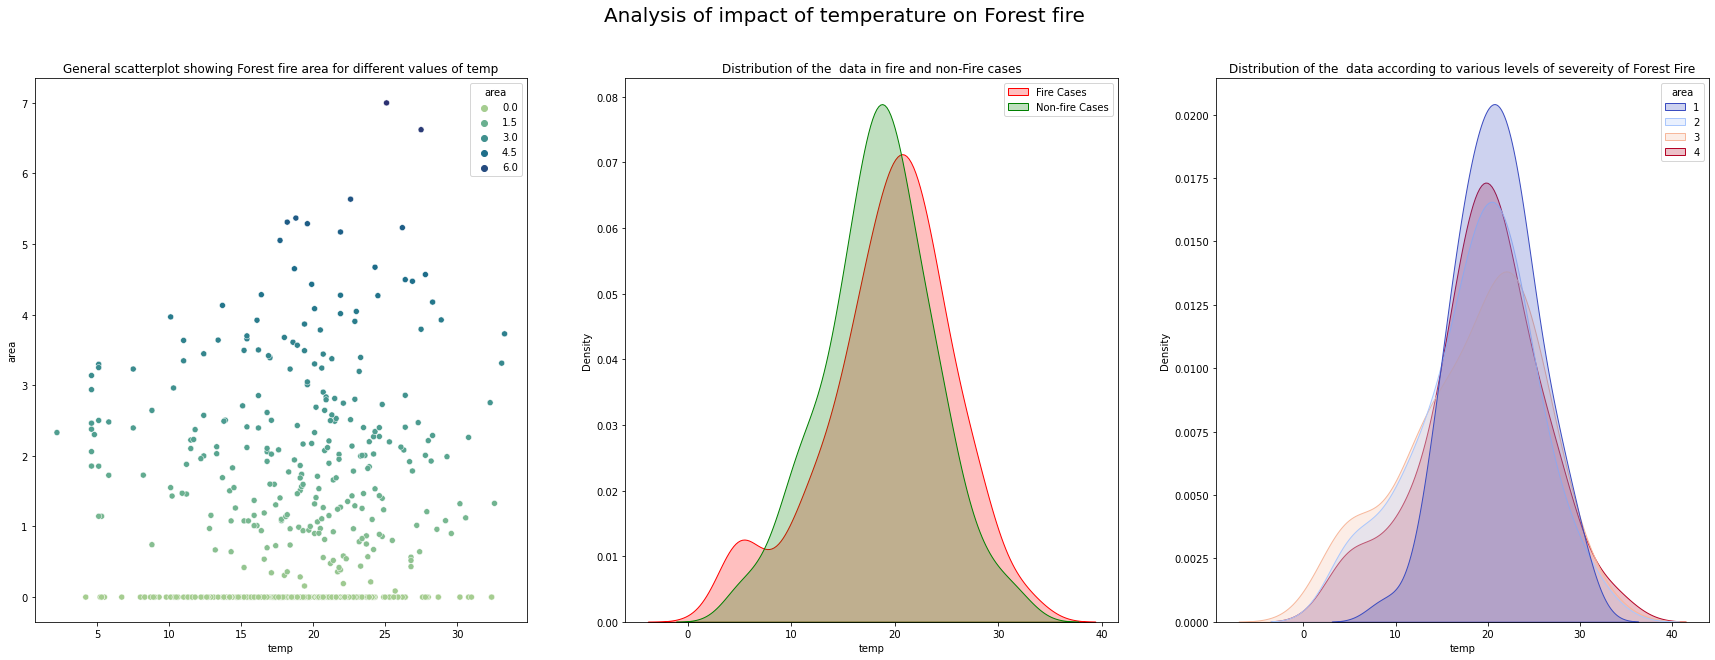

In [18]:
numerical_analysis("temp","area")
plt.suptitle("Analysis of impact of temperature on Forest fire", fontsize =20)
plt.show()

* For temperature ranging from 5 to 40 the forest fire probability peaks at 22.
* 3rd plot suggests that all 4 levels of forest fire we consider are nearly peaking at 22.So temperature can be a factor for consideration in forest fire prediction

### Analysis of forest fire area with RH

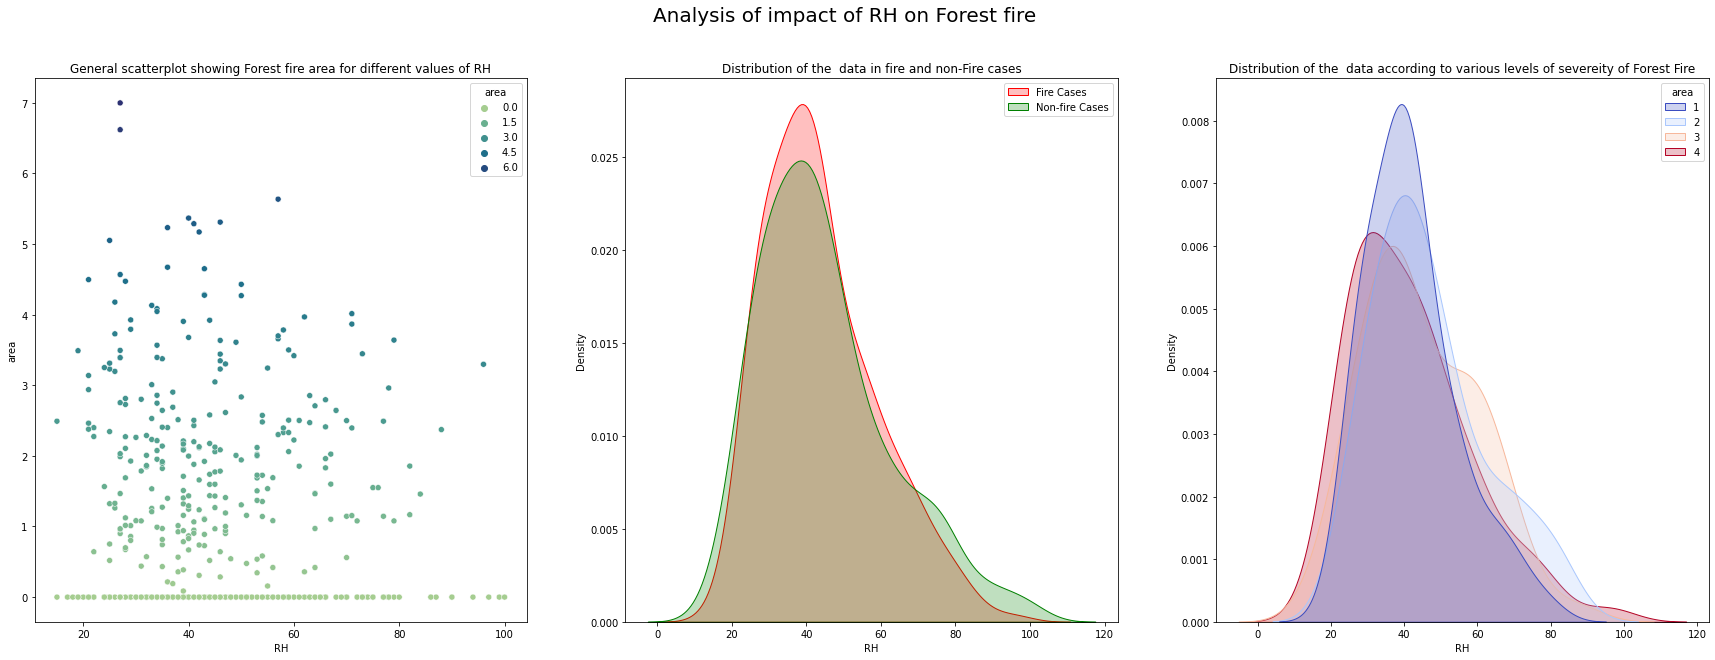

In [19]:
numerical_analysis("RH","area")
plt.suptitle("Analysis of impact of RH on Forest fire", fontsize =20)
plt.show()

* Although the 2nd plot shows that the data are nearly equal, the 3rd plot suggests that chances of mild fire is very high for RH around 45.
* The 3rd plot which includes only forest fire cases shows that most dangerous forest fires tend to occour at low temperatures.

### Analysis of forest fire area with wind

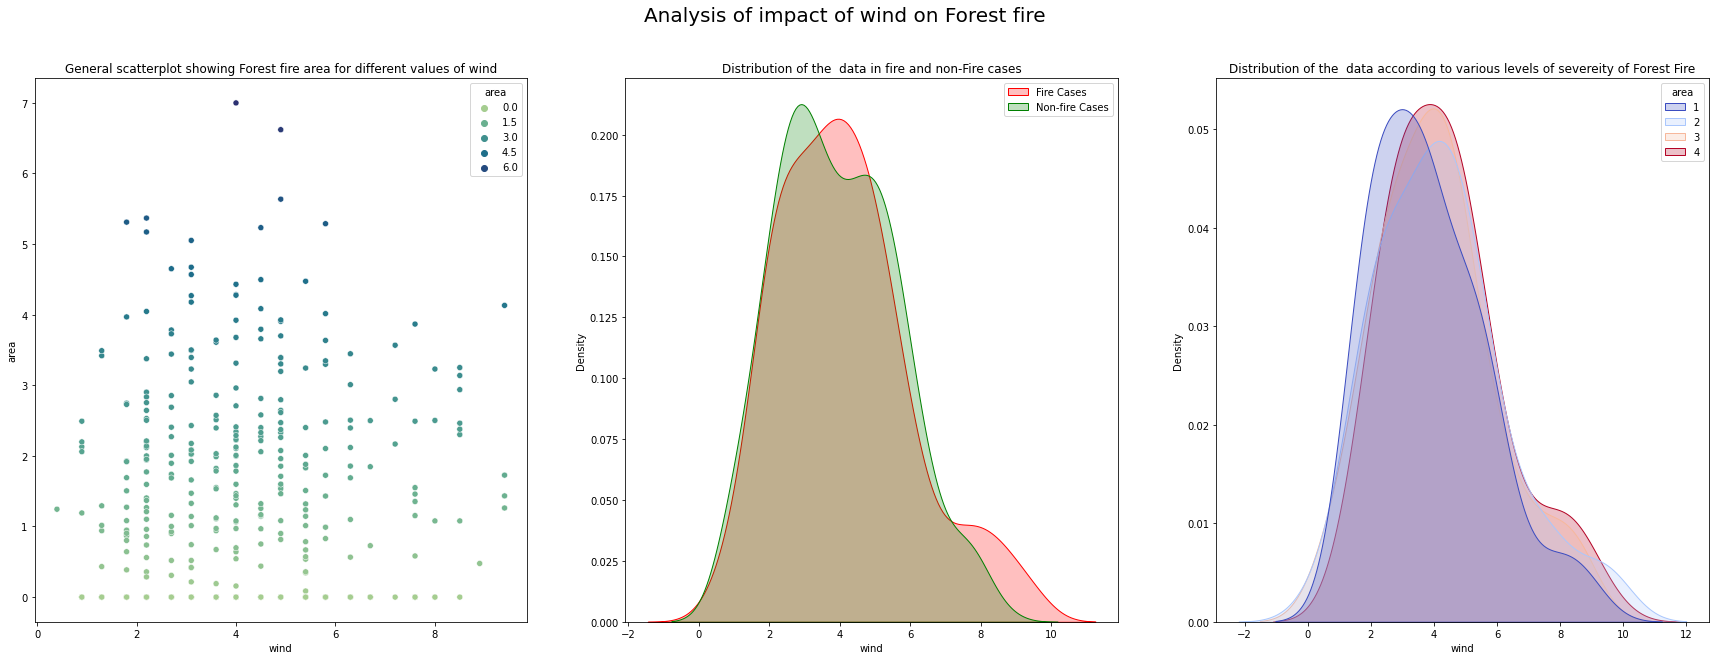

In [20]:
numerical_analysis("wind","area")
plt.suptitle("Analysis of impact of wind on Forest fire", fontsize =20)
plt.show()

* We can see from the 3rd plot that most dangerous kind of forest fires occour during wind of speed around 4, while mild forest fires occour at low breeze.

* We can consider wind as a factor which helps in fire propogation.

### Analysis of forest fire area with rain

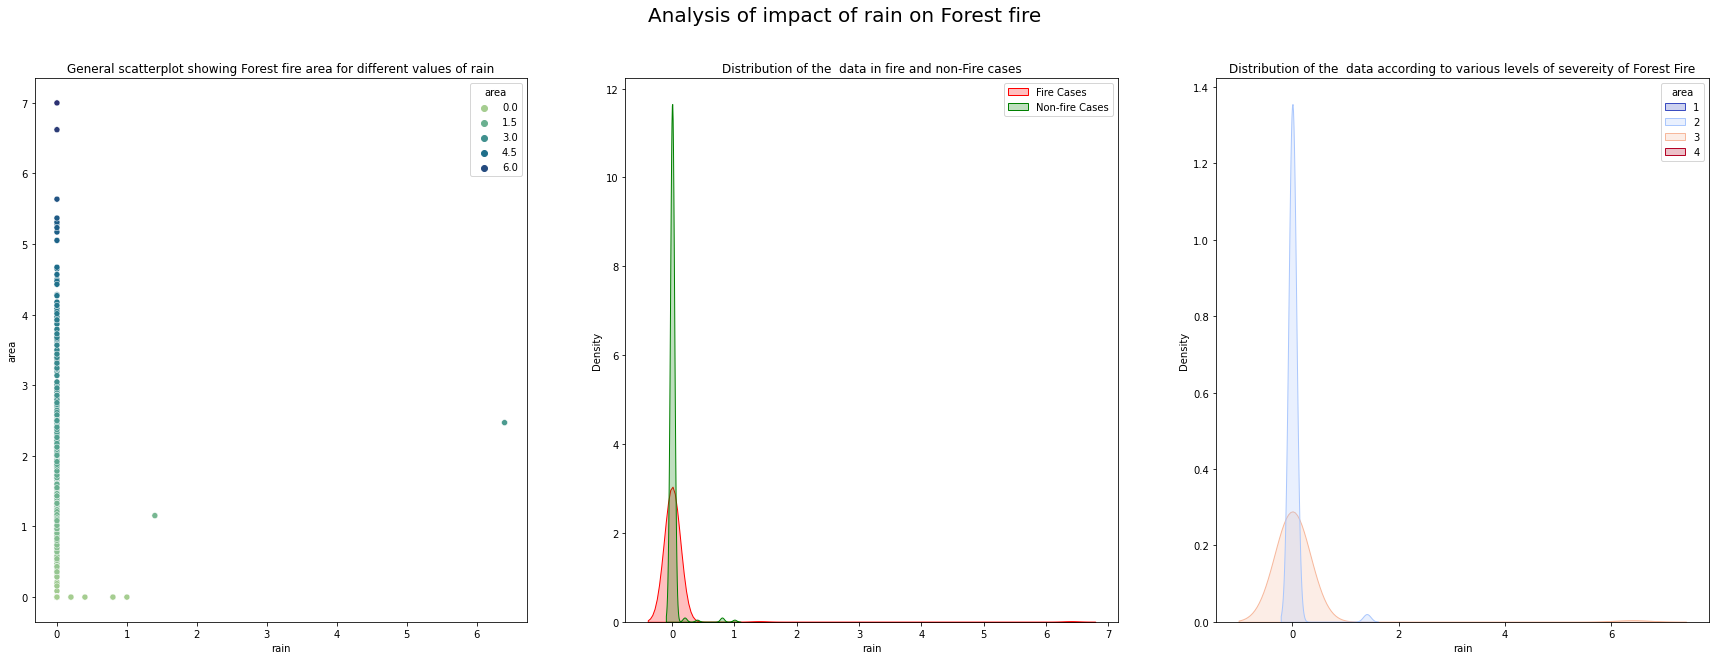

In [21]:
numerical_analysis("rain","area")
plt.suptitle("Analysis of impact of rain on Forest fire", fontsize =20)
plt.show()

* As Expected most of the forest fires occur when there is no rain.
* We can spot an outlier in the first plot which shows there is a fire even when there is rain.

# Conclusion

We see that most of the features contain hidden representaions.We are confident that no factor alone is responsible for such forest fires, forest fires are cause by some combination of these factors.Judging on the relative importance we can  include almost all the features for our modelling giving more importance to features like rain, RH, temp etc. and a little less focus on weather invariant features.